In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# %matplotlib inline

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")
data = pd.DataFrame(data)
data.head(10)

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
5  15728773    Male   27            58000          0
6  15598044  Female   27            84000          0
7  15694829  Female   32           150000          1
8  15600575    Male   25            33000          0
9  15727311  Female   35            65000          0

In [10]:
Y = data["Purchased"]

Y = np.array(Y)

Y = Y[:int(0.3*len(Y))]
print(len(Y))
Y = pd.DataFrame(Y, columns=['T'])

120


In [4]:
X1 = data["EstimatedSalary"]
X2 = data["Age"]

X1 = X1/X1.mean()
X2 = X2/X2.mean()


X1 = np.array(X1)
X2 = np.array(X2)


X1 = X1[:int(0.3*len(X1))]
X2 = X2[:int(0.3*len(X2))]

print(len(X1))
print(len(X2))

X1 = pd.DataFrame(X1)
X2 = pd.DataFrame(X2)


X = pd.concat([X1, X2], axis=1)
X = np.array(X)

120
120


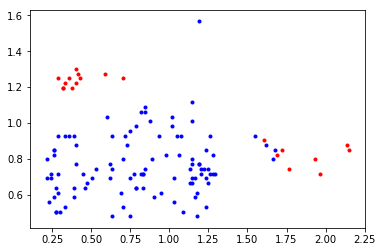

In [11]:
for i in range(len(Y)):
    if Y['T'].iloc[i] == 1:
        plt.scatter(X[i][0], X[i][1], marker='.', c='r')
    else:
        plt.scatter(X[i][0], X[i][1], marker='.', c='b')
        
plt.show()

In [ ]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# for i in range(len(Y)):
#     if int(Y[i]) == 1:
#         ax.scatter(X[i][0], X[i][1], marker='.', c='r')
#     else:
#         ax.scatter(X[i][0], X[i][1], marker='.', c='b')
        
# plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(90, 0)
for i in range(len(Y)):
    if int(Y[i]) == 1:
        ax.scatter(X[i][0], X[i][1], Y[i], marker='.', c='r')
    else:
        ax.scatter(X[i][0], X[i][1], Y[i], marker='.', c='b')
        
plt.show()

In [ ]:
count_1 = 0
count_0 = 0
for i in range(len(X)):
    if Y[i] == 1:
        count_1 += 1
    else:
        count_0 += 1
print(f"Count of 0's : {count_0},\nCount of 1's : {count_1}")

In [ ]:
postiveX=[]
negativeX=[]
for i,v in enumerate(Y):
    if v==0:
        negativeX.append(X[i])
    else:
        postiveX.append(X[i])

#our data dictionary
data_dict = {-1:np.array(negativeX), 1:np.array(postiveX)}
# print(data_dict)

In [ ]:
w=[] #weights 2 dimensional vector
b=[] #bias

for yi in data_dict:
    max_feature_value=np.amax(data_dict[yi])            
    min_feature_value=np.amin(data_dict[yi])
        
learning_rate = [max_feature_value * 0.1, max_feature_value * 0.01, max_feature_value * 0.001]
print(max_feature_value)
print(min_feature_value)

In [ ]:
colors = {1:'r',-1:'b'}

In [ ]:
def train(data, w, b, learning_rate):
    opt_dict = {}
    transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
    
    b_range_multiple = 5
    b_multiple = 5
    w_optimum = max_feature_value*20
#     print(w_optimum)
    for step in learning_rate:
        w = np.array([w_optimum,w_optimum])
        optimized = False
#         print(w)
        while not optimized:
            for b in np.arange(-1*(max_feature_value*b_range_multiple), max_feature_value*b_range_multiple, step*b_multiple):
                for transformations in transforms:
                    w_t = w*transformations
                    found_option = True

                    for yi in data:
#                         print(yi)
                        for xi in data[yi]:
#                             yi=i
#                             print(b)
                            if not yi*(np.dot(w_t,xi)+b) >= 1:
#                                 print((np.dot(w_t,xi)+b))
                                found_option = False
#                     print(found_option)
                    if found_option:
                        opt_dict[np.linalg.norm(w_t)] = [w_t,b]
            
#             print(w)
            if w[0] < 0:
                optimized = True
                print("optimized a step")
            else:
                w = w - step
        print(opt_dict)
        norms = sorted([n for n in opt_dict])
        print(norms)
        opt_choice = opt_dict[norms[0]]

        w = opt_choice[0]
        b = opt_choice[1]

        latest_optimum = opt_choice[0][0] + step*2

In [ ]:
def predict(features,w,b):
    classification = np.sign(np.dot(np.array(features),w ) + b)

    if classification != 0 and visualization:
        ax.scatter(features[0], features[1], s=10, marker='*', c=colors[classification])

    return classification

In [ ]:
def visualize(data_dict, w, b):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    [[ax.scatter(x[0], x[1], s=10, color=colors[i]) for x in data_dict[i]] for i in data_dict]

    def hyperplane(x,w,b,v):
        return (-w[0]*x - b + v ) / w[1]

    datarange = (min_feature_value*0.9, max_feature_value*1.1)

    hyp_x_min = datarange[0]
    hyp_x_max = datarange[1]

    psv1 = hyperplane(hyp_x_min, w, b, 1)
    psv2 = hyperplane(hyp_x_max, w, b, 1)

    ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'k')

    ################################################

    nsv1 = hyperplane(hyp_x_min, w, b, -1)
    nsv2 = hyperplane(hyp_x_max, w, b, -1)

    ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], 'k')

    ################################################

    db1 = hyperplane(hyp_x_min, w, b, 0)
    db2 = hyperplane(hyp_x_max, w, b, 0)

    ax.plot([hyp_x_min, hyp_x_max], [db1, db2], 'y--') 

    plt.show()

In [ ]:
train(data_dict, w, b, learning_rate)
visualize()

In [ ]:
# def svm_sgd_plot(x, y):
#     #Initialize our SVMs weight vector with zeros (3 values)
#     w = np.zeros(len(x[0]))
#     #The learning rate
#     eta = 1
#     #how many iterations to train for
#     epochs = 100000
#     #store misclassifications so we can plot how they change over time
#     errors = []

#     #training part, gradient descent part
#     for epoch in range(1,epochs):
#         error = 0
#         for i, v in enumerate(x):
#             #misclassification
#             if (y[i]*np.dot(x[i], w)) < 1:
#                 #misclassified update for ours weights
#                 w = w + eta * ( (x[i] * y[i]) + (-2  *(1/epoch)* w) )
#                 error = 1
#             else:
#                 #correct classification, update our weights
#                 w = w + eta * (-2  *(1/epoch)* w)
#         errors.append(error)
# #         if epoch % 1000 == 0:
# #             print(f"W: {w}")
    
#     plt.plot(errors, '|')
#     plt.ylim(0.5,1.5)
#     plt.axes().set_yticklabels([])
#     plt.xlabel('Epoch')
#     plt.ylabel('Misclassified')
#     plt.show()

#     return w

In [ ]:
# w = svm_sgd_plot(X,Y)
# print(w)

In [ ]:
# for i in range(len(Y)):
#     if int(Y[i]) == 1:
#         plt.scatter(X[i][0], X[i][1], marker='.', c='r')
#     else:
#         plt.scatter(X[i][0], X[i][1], marker='.', c='b')
# # Print the hyperplane calculated by svm_sgd()
# x2=[w[0],w[1],-w[1],w[0]]
# x3=[w[0],w[1],w[1],-w[0]]

# x2x3 =np.array([x2,x3])
# A,B,U,V = zip(*x2x3)
# ax = plt.gca()
# ax.quiver(A,B,U,V,scale=1, color='blue')

In [ ]:
# data.Gender = data.Gender.replace('Male', 1)
# data.Gender = data.Gender.replace("Female", 0)